<a href="https://colab.research.google.com/github/RakeshBB08/MachineLearning/blob/master/Support_Vector_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("Position_Salaries.csv")
X = dataset.iloc[:,1:-1].values
y = dataset.iloc[:,-1].values

In [3]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
# we dont need to apply feature scaling for linear regression models
# Feature scaling refers to scaling a value confined to specific range
#  reshaping of array is done using array.reshape(rows,columns)
y = y.reshape(len(y),1)

##Feature scaling

In [5]:
# scaling value ranges from -3 to 3

In [22]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

In [23]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [24]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [39]:
print(y)
y_real = sc_y.inverse_transform(y).reshape(-1,1)
print(y_real)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]
[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [25]:
from sklearn.svm import SVR
svr = SVR(kernel = "rbf")
svr.fit(X,y)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

In [26]:
sc_y.inverse_transform(svr.predict(sc_X.transform([[6.5]])).reshape(-1,1))

array([[0.01150915]])

Text(0.5, 1.0, 'Truth or bluff')

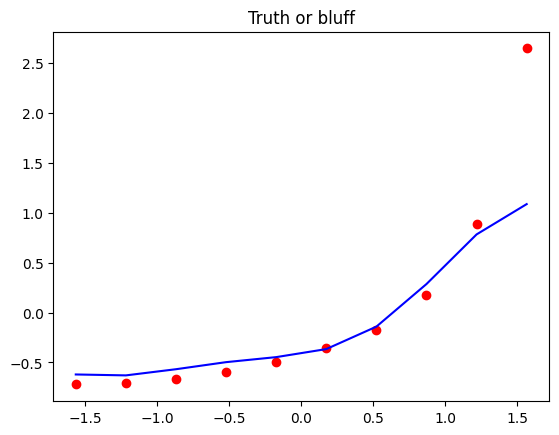

In [27]:
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color = "red")
plt.plot(sc_X.inverse_transform(X),sc_y.inverse_transform(svr.predict(X).reshape(-1,1)),color = "blue" )
plt.title("Truth or bluff")


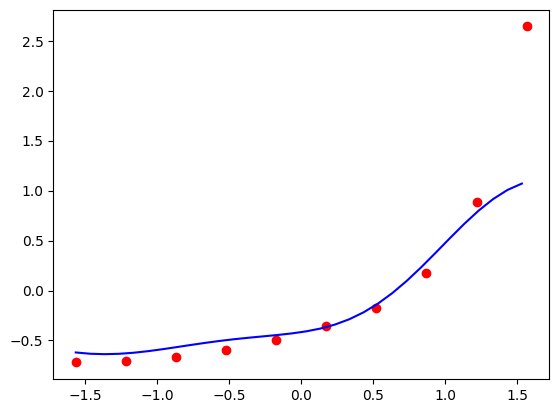

In [43]:
# smooth curve
X_grid = np.arange(min(sc_X.inverse_transform(X)),max(sc_X.inverse_transform(X)),0.1)
X_grid = X_grid.reshape(len(X_grid),1)
plt.scatter(sc_X.inverse_transform(X),sc_y.inverse_transform(y),color = "red")
plt.plot(X_grid,sc_y.inverse_transform(svr.predict(X_grid).reshape(-1,1)),color = "blue" )
